# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from config import weather_api_key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# create multiple lists for information that we need to chart the scatterplots
city_label = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# print the text for the beginning of the log
print(f"Beginning Data Retrieval\n---------------------------")

# set the starting counter for city and set
record = 1
grp = 1

# looping all the cities in the cities list and get the weather check record
for city in cities:
#    query = url + "appid=" + weather_api_key + "&q=" + city
    query = url + "appid=" + api_key + "&units=imperial" + "&q=" + city 
    response = requests.get(query).json()
    time.sleep(1)

    # making exception. Print the city name if record is found    
    try:
        city_label.append(response['name'])
        city_id.append(response['id'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])        
        humidity.append(response['main']['humidity'])
        lat.append(response["coord"]["lat"])
        lng.append(response['coord']['lon'])   
        max_temp.append(response['main']['temp_max'])   
        wind_speed.append(response['wind']['speed'])
        
        city_name = response['name']
        cid = response['id']
        print(f"Processing record {record} of Set {grp} | {city_name} (ID = {cid})")

        # The cities are divided into 50 cities per set. Starting log with record "1" and set "1" 
        # Once the record hits 50 cities, it starts off with record "1" again of the next set number
        if record < 50:
            record += 1    
        else:
            record = 1
            grp +=1        
            
    # if there is an error, print the following message
    except:
        pass
        print (f"City not found. Skipping...")
                    
# print the end of log
print(f"---------------------------\n Data Retrieval Complete\n ---------------------------")

Beginning Data Retrieval
---------------------------
Processing record 1 of Set 1 | New Norfolk (ID = 2155415)
Processing record 2 of Set 1 | George Town (ID = 1735106)
Processing record 3 of Set 1 | Hermanus (ID = 3366880)
Processing record 4 of Set 1 | Barrow (ID = 5880054)
Processing record 5 of Set 1 | Huarmey (ID = 3939168)
Processing record 6 of Set 1 | Kaitangata (ID = 2208248)
Processing record 7 of Set 1 | Albany (ID = 5106841)
Processing record 8 of Set 1 | Longyearbyen (ID = 2729907)
Processing record 9 of Set 1 | La Libertad (ID = 3655131)
City not found. Skipping...
Processing record 10 of Set 1 | Hobart (ID = 2163355)
Processing record 11 of Set 1 | Bati (ID = 342641)
Processing record 12 of Set 1 | Bubaque (ID = 2374583)
Processing record 13 of Set 1 | Punta Arenas (ID = 3874787)
Processing record 14 of Set 1 | Berlevag (ID = 780687)
Processing record 15 of Set 1 | Hithadhoo (ID = 1282256)
Processing record 16 of Set 1 | Solano (ID = 5396987)
Processing record 17 of Set 

Processing record 38 of Set 3 | Poum (ID = 2138555)
Processing record 39 of Set 3 | Sao Filipe (ID = 3374210)
Processing record 40 of Set 3 | Vestmanna (ID = 2610343)
Processing record 41 of Set 3 | Plouzane (ID = 2986626)
City not found. Skipping...
Processing record 42 of Set 3 | Umm Kaddadah (ID = 364933)
Processing record 43 of Set 3 | Indramayu (ID = 1643078)
City not found. Skipping...
Processing record 44 of Set 3 | Olga (ID = 2018553)
City not found. Skipping...
Processing record 45 of Set 3 | Baijiantan (ID = 1529626)
Processing record 46 of Set 3 | Clyde River (ID = 5924351)
Processing record 47 of Set 3 | Haines Junction (ID = 5969025)
Processing record 48 of Set 3 | Rio Claro (ID = 3451234)
City not found. Skipping...
Processing record 49 of Set 3 | Dikson (ID = 1507390)
Processing record 50 of Set 3 | San Patricio (ID = 3985168)
Processing record 1 of Set 4 | Los Llanos de Aridane (ID = 2514651)
City not found. Skipping...
Processing record 2 of Set 4 | Wahiawa (ID = 58539

Processing record 27 of Set 6 | Brae (ID = 2654970)
Processing record 28 of Set 6 | Khokhlovo (ID = 549854)
Processing record 29 of Set 6 | Locri (ID = 2524371)
Processing record 30 of Set 6 | Gouyave (ID = 3580279)
Processing record 31 of Set 6 | Inongo (ID = 2315417)
Processing record 32 of Set 6 | Port Hedland (ID = 2063042)
Processing record 33 of Set 6 | Lagoa (ID = 3372964)
Processing record 34 of Set 6 | Takoradze (ID = 2294915)
Processing record 35 of Set 6 | Westport (ID = 4845585)
Processing record 36 of Set 6 | Talnakh (ID = 1490256)
City not found. Skipping...
Processing record 37 of Set 6 | Giohar (ID = 56335)
Processing record 38 of Set 6 | Viedma (ID = 3832899)
Processing record 39 of Set 6 | Arawa (ID = 2100633)
Processing record 40 of Set 6 | Kavieng (ID = 2094342)
Processing record 41 of Set 6 | Kruisfontein (ID = 986717)
Processing record 42 of Set 6 | Hofn (ID = 2630299)
Processing record 43 of Set 6 | Tupik (ID = 2014836)
Processing record 44 of Set 6 | Porosozero 

Processing record 19 of Set 9 | Healdsburg (ID = 5356012)
Processing record 20 of Set 9 | Iqaluit (ID = 5983720)
Processing record 21 of Set 9 | Mujiayingzi (ID = 2035707)
Processing record 22 of Set 9 | Gimli (ID = 5961417)
Processing record 23 of Set 9 | Velyka Oleksandrivka (ID = 690288)
City not found. Skipping...
Processing record 24 of Set 9 | Mbanza-Ngungu (ID = 2312888)
City not found. Skipping...
Processing record 25 of Set 9 | Kigoma (ID = 157738)
City not found. Skipping...
Processing record 26 of Set 9 | Caravelas (ID = 3466980)
Processing record 27 of Set 9 | Iwaki (ID = 2112539)
Processing record 28 of Set 9 | Airdrie (ID = 2657613)
Processing record 29 of Set 9 | Pangkalanbuun (ID = 1632694)
Processing record 30 of Set 9 | Port-Gentil (ID = 2396518)
Processing record 31 of Set 9 | Gelibolu (ID = 746983)
Processing record 32 of Set 9 | Guia de Isora (ID = 2516860)
Processing record 33 of Set 9 | Vanimo (ID = 2084442)
Processing record 34 of Set 9 | Puerto Carreno (ID = 36

Processing record 8 of Set 12 | Alice Springs (ID = 2077895)
Processing record 9 of Set 12 | Port Hardy (ID = 6111862)
Processing record 10 of Set 12 | Ouahigouya (ID = 2357043)
Processing record 11 of Set 12 | San Isidro (ID = 3929631)
Processing record 12 of Set 12 | Doka (ID = 376332)
Processing record 13 of Set 12 | Aquiraz (ID = 3407407)
Processing record 14 of Set 12 | Zhigansk (ID = 2012530)
Processing record 15 of Set 12 | San Jose (ID = 5392171)
Processing record 16 of Set 12 | Kosh-Agach (ID = 1502422)
Processing record 17 of Set 12 | Nizhneangarsk (ID = 2019199)
Processing record 18 of Set 12 | North Bend (ID = 5742974)
Processing record 19 of Set 12 | Yong'an (ID = 1806687)
City not found. Skipping...
Processing record 20 of Set 12 | Ende (ID = 1644932)
Processing record 21 of Set 12 | Misratah (ID = 2214846)
Processing record 22 of Set 12 | Agadir (ID = 2561668)
Processing record 23 of Set 12 | Morehead (ID = 4301317)
Processing record 24 of Set 12 | Cavalcante (ID = 34665

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed

weather_dict = {
    "City": city_label,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

In [5]:
weather_data.head()

# save dataframe to csv
weather_data.to_csv('../weather_data.csv', index=False)  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
import datetime
import matplotlib

def scatter(xlabel, x, ylabel, y,ytitle):
    
    plt.scatter(weather_data[x],weather_data[y])
    
    
    dt = weather_data['Date'].iloc[0]
    date = datetime.datetime.fromtimestamp(dt).strftime('%Y-%m-%d')
    
    plt.title(f"{xlabel} vs. {ytitle} ({date})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig("./Charts/" + xlabel + " vs. " + ytitle + ".png")
    plt.show()

#### Latitude vs. Temperature Plot

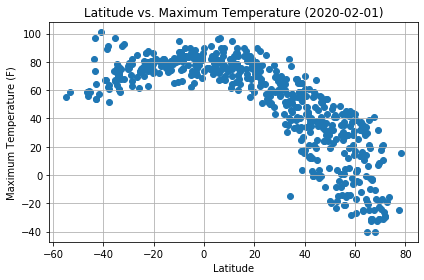

In [7]:
scatter('Latitude','Lat','Maximum Temperature (F)','Max Temp','Maximum Temperature')

#### Observation:
> The scatterplot shows a negative relationship between maximum temperature and latitude. As latitude increases, maximum temperature decreases.

#### Latitude vs. Humidity Plot

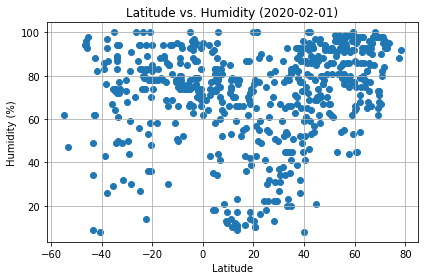

In [8]:
scatter('Latitude','Lat','Humidity (%)','Humidity','Humidity')

#### Observation:
> Per the scatterplot, there may be little to no relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

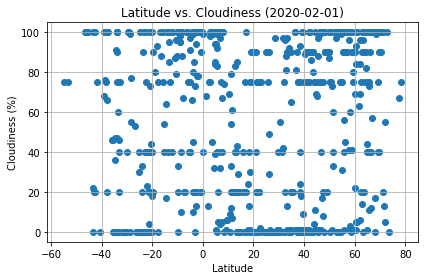

In [9]:
scatter('Latitude','Lat','Cloudiness (%)','Cloudiness','Cloudiness')

#### Observation:
> Per the scatterplot, there may be little to no relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

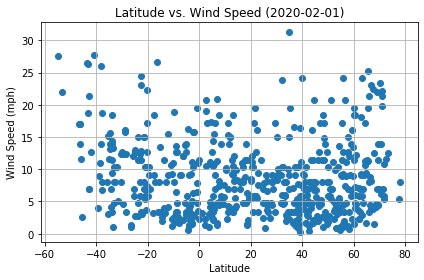

In [10]:
scatter('Latitude','Lat','Wind Speed (mph)','Wind Speed','Wind Speed')

#### Observation:
> Per the scatterplot, there may be little to no relationship between latitude and wind speed.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

def regression(x,y,xlabel,ylabel,hemisphere):
    
    hemisphere_df = weather_data.loc[(weather_data['Hemisphere']==hemisphere),:]
    
    x_values = hemisphere_df[x]
    y_values = hemisphere_df[y]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {round(rvalue**2,2)}")
    plt.savefig("./Charts/" + xlabel + " vs. " + ylabel + " - " + hemisphere + " Hemisphere" + ".png")
    plt.show()

In [24]:
# read weather data
weather_data = pd.read_csv("../weather_data.csv")

# Create an array of latitudes
latitude = np.array(weather_data['Lat'])

# Create a list to store the hemisphere data
hemisphere_data = []

# appending hemisphere information to the list
for x in latitude:
    if x <0:
        hemisphere_data.append('Southern')
    else:
        hemisphere_data.append('Northern')

# Adding a hemisphere column to existing weather dataframe        
weather_data['Hemisphere'] = hemisphere_data

# Check dataframe
weather_data.sort_values('Lat')

# save dataframe to csv file
weather_data.to_csv('../hemisphere_data.csv', index=False)  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.71


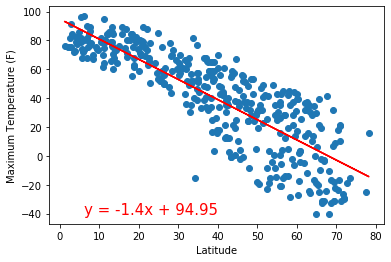

In [13]:
regression('Lat','Max Temp','Latitude','Maximum Temperature (F)','Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22


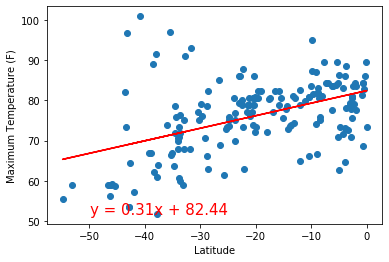

In [14]:
regression('Lat','Max Temp','Latitude','Maximum Temperature (F)','Southern')

#### Observation:
> In the Northern hemisphere, as the latitude increases, maximum temperature decreases. In contrast, as latitude increases, maximum temperature in the Southern hemisphere increases. Interestingly, latitude in the northern hemisphere seems to be doing a better job in explaining the variance in maximum temperature versus latitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19


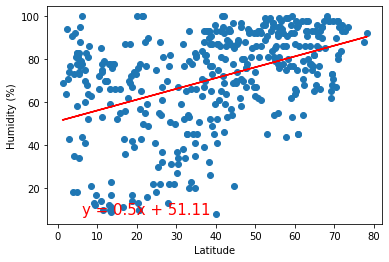

In [15]:
regression('Lat','Humidity','Latitude','Humidity (%)','Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04


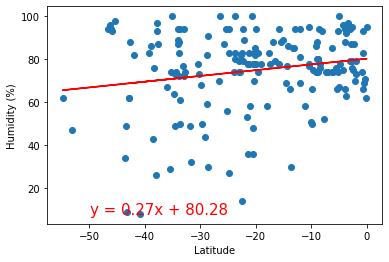

In [16]:
regression('Lat','Humidity','Latitude','Humidity (%)','Southern')

#### Observation:
> Both scatterplots show a positive relationship between latitude and humidity. Similarly, latitude in the Northern hemisphere seems to explain higher variance in humidity than latitude in the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


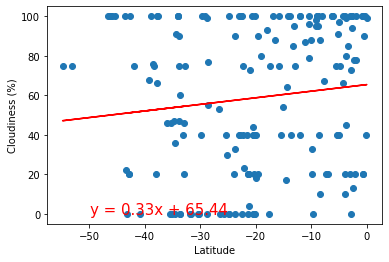

In [17]:
regression('Lat','Cloudiness','Latitude','Cloudiness (%)','Southern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


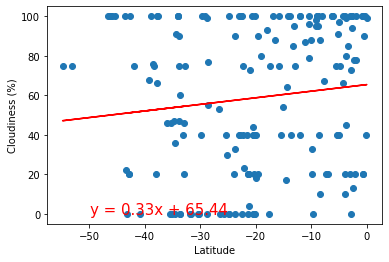

In [18]:
regression('Lat','Cloudiness','Latitude','Cloudiness (%)','Southern')

#### Observation:
> The regression line in both scatterplots are almost flat, explaining little to no relationship between latitude and cloudiness. Variance accounted for in cloudiness by latitude in both Northern and Southern hemisphere is only 1% for both models.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


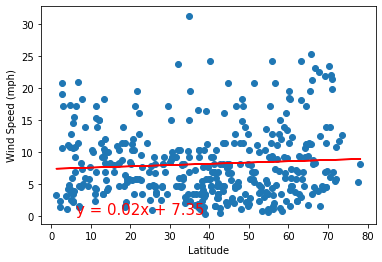

In [19]:
regression('Lat','Wind Speed','Latitude','Wind Speed (mph)','Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16


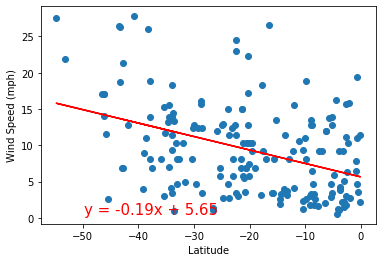

In [20]:
regression('Lat','Wind Speed','Latitude','Wind Speed (mph)','Southern')

#### Observation:
> Interestingly, the regression line in the scatterplot of the Northern hemisphere is flat, again, showing little to no relationship. In contrast, there is a negative relationship between latitude in the Southern hemisphere and wind speed.